# EDA

## 1. Importanto bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import calendar

%matplotlib inline 

## 2. Importando `.csv`

O csv possui dados separados por `;`. Logo, o método `pd.read_csv` precisa de um indicador que a separação está dessa maneira:


https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [3]:
bank = pd.read_csv('bank_bank-full.csv', sep=';')
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


## 3. EDA Inicial

1. Contar o número de colunas no dataset
2. Descobrindo o `shape` do dataset

In [4]:
print(len(bank.columns), bank.columns)

17 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
bank.shape

(45211, 17)

## 4. Verificando variável alvo

1. Calcular quantidade de pessoas que recusaram
2. Calcular quantidade de pessoas que aceitaram
3. Calcular porcentagem de pessoas que recusaram
4. Calcular porcentagem de pessoas que aceitaram

In [6]:
recusaram = len(bank[bank['y'] == 'no'])
aceitaram = len(bank[bank['y'] == 'yes'])
total = len(bank)

print("Recusaram: ", recusaram)
print("Aceitaram: ", aceitaram)


Recusaram:  39922
Aceitaram:  5289


In [7]:
100 * recusaram/total

88.30151954170445

In [8]:
100 * aceitaram/total

11.698480458295547

## 5. CountPlot

Visualizando gráfico de quantidade dos itens classificados

Biblioteca de gráficos: https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot

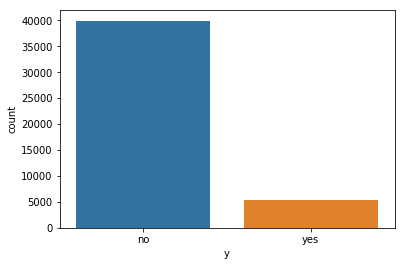

In [8]:
sns.countplot(x=bank['y'], data=bank)

## 6. Relacionando variáveis de entrada com a váriavel alvo

1. Verificando a relação entre a Idade e a aceitação do produto

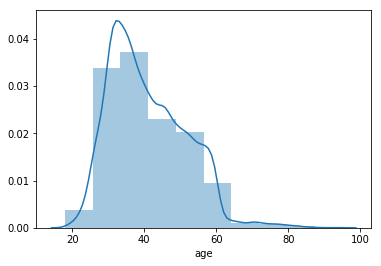

In [10]:
bank_yes = bank[bank['y'] == 'yes']
bank_no = bank[bank['y'] == 'no']


sns.distplot(bank['age'], bins=10)

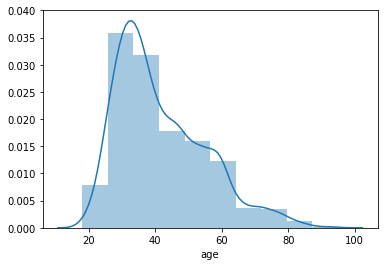

In [11]:
sns.distplot(bank_yes['age'], bins=10)

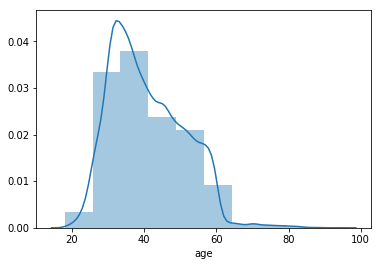

In [12]:
sns.distplot(bank_no['age'], bins=10)

In [13]:
total_pessoas_aceitaram_por_idade = bank_yes.groupby('age')['age'].count()
total_pessoas_por_idade = bank.groupby('age')['age'].count()

porcentagem_aceitaram = pd.DataFrame(100 * total_pessoas_aceitaram_por_idade/total_pessoas_por_idade)

### 6.1 Regressão das idades

Esse plot tem a intenção de mostrar se há alguma relação entre a idade e a aceitação.

Foi criado um dataframe `bank_plot` so para não mexer diretamente no DF `bank`. 


Referência: https://seaborn.pydata.org/generated/seaborn.lmplot.html

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


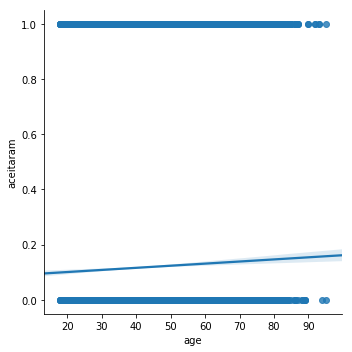

In [14]:
bank_plot = bank
bank_plot['aceitaram'] = bank_plot['y'].apply(lambda x: 1 if x == 'yes' else 0)
sns.lmplot(x='age',y='aceitaram',data=bank_plot)

In [15]:
bank_plot['contact']

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
5          unknown
6          unknown
7          unknown
8          unknown
9          unknown
10         unknown
11         unknown
12         unknown
13         unknown
14         unknown
15         unknown
16         unknown
17         unknown
18         unknown
19         unknown
20         unknown
21         unknown
22         unknown
23         unknown
24         unknown
25         unknown
26         unknown
27         unknown
28         unknown
29         unknown
           ...    
45181     cellular
45182     cellular
45183     cellular
45184     cellular
45185     cellular
45186     cellular
45187     cellular
45188     cellular
45189     cellular
45190     cellular
45191     cellular
45192     cellular
45193     cellular
45194     cellular
45195     cellular
45196     cellular
45197     cellular
45198     cellular
45199     cellular
45200     cellular
45201     cellular
45202     ce

### 6.2 Transformando coluna contact

1. Transformando contato em campo numerico

In [16]:
def transforma_contact(linha):
    if linha == 'cellular':
        return 0
    elif linha == 'telephone':
        return 1
    elif linha == 'unknown':
        return 2

bank_plot['contact'].apply(transforma_contact)
bank_plot['job'].unique()
bank_plot['education'].unique()
bank_plot

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,aceitaram
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0


In [17]:
def month_to_number(x):
    months = {k:v for v,k in enumerate(calendar.month_abbr)}
    return months[str.title(x)]


bank_plot['month_number'] = bank_plot['month'].apply(lambda x: month_to_number(x))

# Explorando os Dados.


* 
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette


### Importante

a legenda ficou dentro da figura e bem ruim de ler, então podemos mudar a legenda para ficar do lado de fora usando: 

* https://matplotlib.org/users/legend_guide.html
* https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

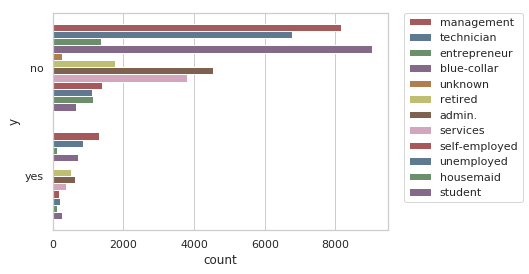

In [18]:
sns.set(style="whitegrid")

_ = sns.countplot(
    y='y',
    hue='job',
    data=bank, 
    palette=sns.color_palette("Set1", n_colors=8, desat=.5)
)

_.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

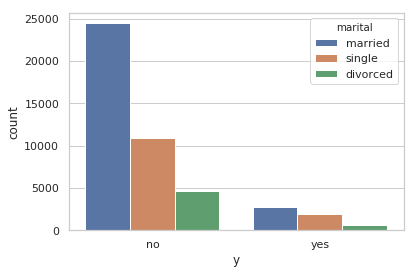

In [19]:
sns.countplot('y',hue='marital',data=bank)

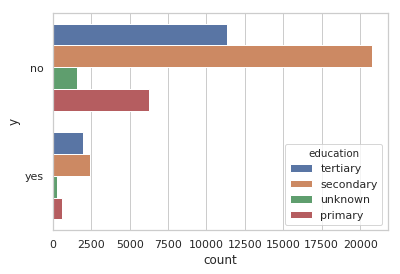

In [20]:
sns.countplot(y='y',hue='education',data=bank)

In [21]:
bank_plot

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,aceitaram,month_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,5
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0,5
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0,5
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0,5
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0,5
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0,5


## Vendo a tendencia de aceitar o que o banco oferece ao longo dos dias do ano e ao longo dos meses

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


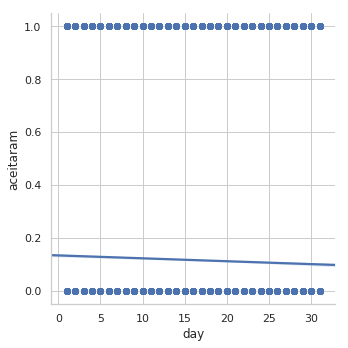

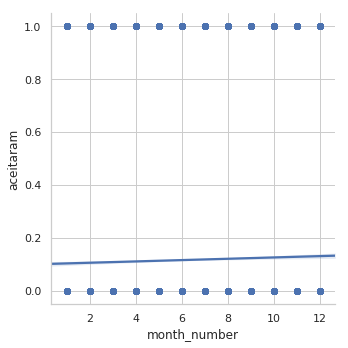

In [22]:
sns.lmplot('day','aceitaram', bank_plot)
sns.lmplot('month_number','aceitaram', bank_plot)

## Tendencias para aceitar o produto a medidade que o banco não liga para os clientes

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


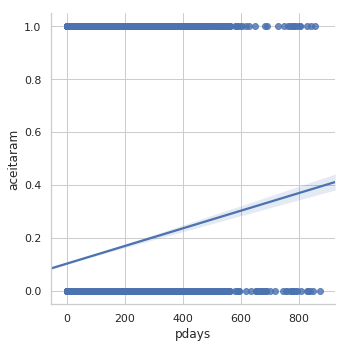

In [23]:
sns.lmplot('pdays','aceitaram', bank_plot)

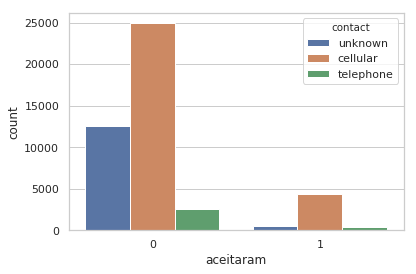

In [24]:
sns.countplot('aceitaram', hue='contact',data=bank_plot)

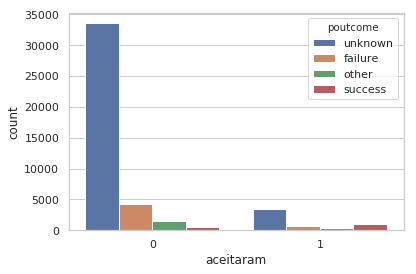

In [25]:
sns.countplot('aceitaram', hue='poutcome',data=bank_plot)


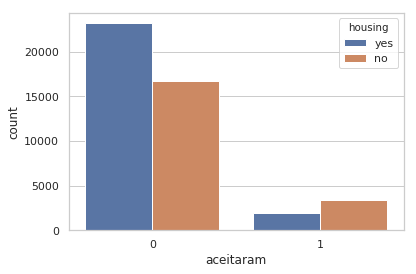

In [26]:
sns.countplot('aceitaram', hue='housing',data=bank_plot)


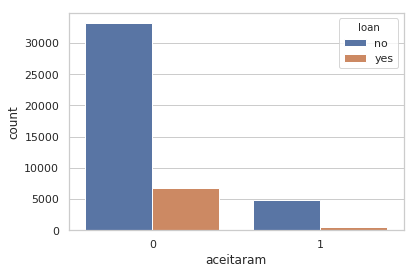

In [27]:
sns.countplot('aceitaram', hue='loan',data=bank_plot)

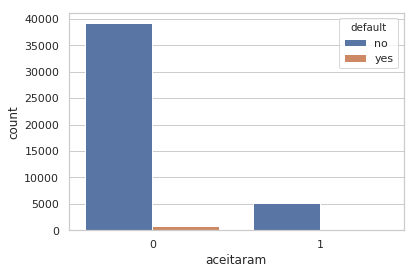

In [28]:
sns.countplot('aceitaram', hue='default',data=bank_plot)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


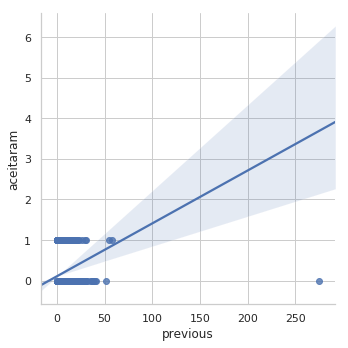

In [29]:
sns.lmplot('previous','aceitaram',data=bank_plot)

# Removendo outlier que foi identificado no plot acima

In [30]:
bank_plot.drop(bank_plot[bank_plot['previous'] > 70].index,inplace=True)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


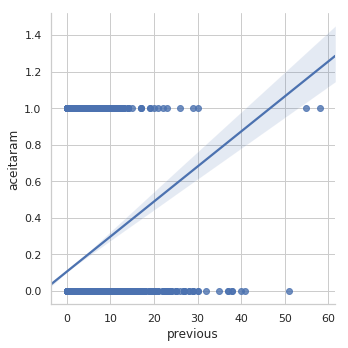

In [31]:
sns.lmplot('previous','aceitaram',data=bank_plot)

# Limpando os dados

Baseado na análise anterior, agora é hora de limpar os dados.


Será feito o tratamento dos dados categoricos com o uso do pandas:



* Retirar a coluna `poutcome` pois não há muita informação interessante. Maioria dos dados são `unkown`

* Transformar a coluna `month` nos números respectivos para cada mês


* Transformar as colunas que são Booleanas de String para Inteiro 

* Remover a coluna 'Y' que agora se chama 'aceitaram'


De acordo com o site do data set: 


```
duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#other attributes: 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
```

Então, retirarei a coluna `duration`


Documentação: 


* [pd.get_dummies ](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

* [pd.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

* [pd.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)

# Informação importante


* https://stackoverflow.com/questions/38621053/how-can-i-use-sklearn-naive-bayes-with-multiple-categorical-features

* https://www.kaggle.com/c/titanic/discussion/5379

In [32]:
extract_columns = ['job','marital','education','contact']
dataset = pd.get_dummies(bank_plot, columns=extract_columns, prefix=extract_columns)
dataset.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,0,0,1,0,1,0,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,0,1,0,0,1,0,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,1,0,0,0,0,1,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


In [33]:
dataset['month'] = bank_plot['month'].apply(lambda x: month_to_number(x))

In [34]:
dataset.drop('duration',axis=1,inplace=True)
dataset.drop('y',axis=1,inplace=True)
dataset.drop('poutcome',axis=1,inplace=True)

In [35]:
def transform_string_boolen_to_int(x):
    if x == 'yes':
        retorno = 1
    elif x == 'no':
        retorno = 0
    else:
        retorno = x
    return retorno

In [36]:
dataset['housing'] = dataset['housing'].apply(transform_string_boolen_to_int)
dataset['loan'] = dataset['loan'].apply(transform_string_boolen_to_int)
dataset['default'] = dataset['default'].apply(transform_string_boolen_to_int)

# Um novo Dataset

Agora com os nossos dados limpos, o dataframe `dataset` é o novo conjunto de dados que devemos trabalhar.

In [37]:
dataset.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
campaign               int64
pdays                  int64
previous               int64
aceitaram              int64
month_number           int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
dtype: object

# Inicio do Machine Learning


## Importando modulos SKlearn

* [Classificação](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

* [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

* [Sklearn Train Test Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

* [Sklearn Classification Report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
X = dataset.drop('aceitaram',axis=1)
y = dataset['aceitaram']
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.33,random_state=42)

In [40]:
classificador = GaussianNB()
classificador.fit(X_train, y_train)
y_predict = classificador.predict(X_test)

# Analisando o report


No geral, aconteceu o que eu disse no hangout anterior.. 


Se o classificador chutasse "Recusaram" pra todos os casos, ele teria uma taxa de acerto altíssima.. E teve! 

A precisão do classificador foi de 83% no geral, pois ele acertou 91% das "Recusaram" e apenas 25% dos "Aceitaram". Podemos pesquisar mais sobre o dataset e tentar mudar alguns hyper parâmetros do Classificador. Isso é bastante estudo para nós! 

In [41]:
print(classification_report(y_test, y_predict,target_names=['Recusaram','Aceitaram']))

             precision    recall  f1-score   support

  Recusaram       0.91      0.83      0.87     13134
  Aceitaram       0.25      0.41      0.31      1786

avg / total       0.83      0.78      0.80     14920

